# Excercise 5: Canonical Analysis

In [1]:
# imports

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

In [2]:
os.getcwd()
matplotlib.rcParams['figure.figsize'] = (20, 10)

## I. Init and EDA

In [42]:
data = pd.read_csv("../Data/districts_cr.csv", encoding='Windows-1250', index_col="Unnamed: 0")
data.describe()

,Earning99,Unempl,Unempl2,Unempl3,BuyingPower,X.Progre,Enterpr,Lifex,Divorce,Abortion,Pop,Crime,Grow.,Migr,Pop65
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,11625.116883,8.890909,12.089610,34.825907,95.779221,236.394805,150.922078,72.216234,52.991723,51.77013,32.881818,33.468976,0.001469,1.017187,13.527466
std,1183.180148,4.098979,11.324003,7.958741,8.028933,11.526011,19.438003,0.858872,9.461625,9.44661,14.584407,14.022319,1.775340,1.755597,1.418252
min,10042.000000,2.800000,0.800000,12.839506,83.000000,215.500000,108.000000,69.700000,37.642046,37.70000,0.000000,16.566907,-3.626882,-1.503942,9.609388
25%,10925.000000,6.000000,4.500000,30.804810,90.000000,229.400000,137.000000,71.850000,45.840708,44.70000,23.500000,24.548244,-0.978749,0.066833,12.664899
50%,11326.000000,7.900000,8.000000,35.481055,95.000000,234.900000,149.000000,72.350000,51.632047,50.30000,35.100000,29.373783,0.111987,0.782924,13.688415
75%,11956.000000,11.300000,15.800000,39.307787,99.000000,243.600000,161.000000,72.850000,57.434402,56.70000,44.100000,39.463535,0.644199,1.389803,14.686678
max,17437.000000,21.500000,56.600000,53.784541,135.000000,278.600000,223.000000,73.750000,82.432432,84.00000,59.100000,100.981444,8.105023,11.580121,16.339991


In [4]:
econ_cols = data.columns[:7]
demo_cols = data.columns[7:]

## Outlier Detection

In [5]:
scaler = StandardScaler()

data_ss = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data_ss.index = data.index

data_ss.head(15)

,Earning99,Unempl,Unempl2,Unempl3,BuyingPower,X.Progre,Enterpr,Lifex,Divorce,Abortion,Pop,Crime,Grow.,Migr,Pop65
CapitalPraha,4.944297,-1.348364,-0.674618,-1.212578,4.916963,3.685746,3.732409,1.211526,0.224098,0.312184,-2.269372,4.846216,-1.602400,-0.114942,1.996097
Benešov,-0.235749,-1.323808,-0.870170,-2.780663,0.027678,-0.549720,0.521865,-0.370611,-0.957481,0.056459,0.725923,-0.073894,-1.394194,-0.134313,0.939093
Beroun,0.563079,-0.955463,-0.727950,0.037474,0.529143,0.210044,0.521865,-0.546404,-0.224950,0.365460,1.367772,1.045457,-0.191206,1.144104,0.709016
Kladno,0.580093,0.223239,-0.239072,0.718458,0.529143,1.336591,-0.979841,-0.839392,0.820172,1.249844,-0.323120,0.547950,0.487318,1.104206,0.319114
Kolín,0.136016,0.223239,-0.363513,0.380464,0.153045,0.585559,-0.099531,-0.136221,-0.876633,0.003183,1.229740,0.294205,-1.424505,0.198124,1.354830
Kutná Hora,-0.600709,0.591584,0.827573,0.566832,0.278411,-0.855373,0.055818,0.332561,0.496377,0.290874,0.498170,0.331249,-1.166319,-0.321205,0.874680
Mělník,1.408696,-0.366112,-0.203517,0.081291,0.654510,0.227510,0.470082,-0.429209,1.724370,1.047395,0.505072,2.068135,0.357271,0.481397,-0.073337
Mladá Boleslav,2.995293,-1.397477,-0.914613,-0.722837,1.030608,-0.846640,0.211167,-0.194818,0.289635,-0.998408,-0.136777,1.875323,0.290408,0.642849,0.041208
Nymburk,-0.259570,0.002232,-0.639063,0.644914,0.403777,0.472031,1.246826,-0.077623,0.012799,-0.977098,0.774234,0.179283,-0.283514,1.515450,1.351329
Praha-východ,2.025470,-1.446589,-1.003500,-2.458778,1.782806,1.127001,1.868222,0.273963,-0.166870,-0.135335,0.939872,2.141636,1.243002,2.489201,0.813501


<AxesSubplot:>

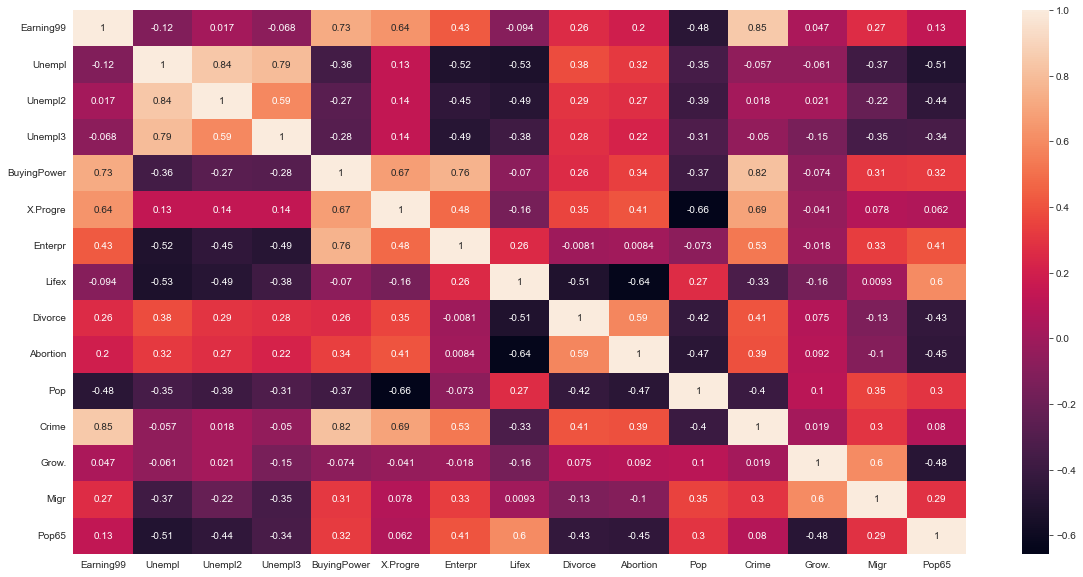

In [6]:
sns.heatmap(data_ss.corr(), annot=True)

## II. Standardization

In [48]:
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].index

,Earning99,Unempl,Unempl2,Unempl3,BuyingPower,X.Progre,Enterpr,Lifex,Divorce,Abortion,Pop,Crime,Grow.,Migr,Pop65
Benešov,11348,3.5,2.3,12.839506,96,230.1,161,71.90,43.991416,52.3,43.4,32.439563,-2.457573,0.782924,14.850659
Beroun,12287,5.0,3.9,35.122210,100,238.8,161,71.75,50.877193,55.2,52.7,48.033198,-0.335775,3.012688,14.526477
Kladno,12307,9.8,9.4,40.506678,100,251.7,132,71.50,60.701330,63.5,28.2,41.102444,0.860988,2.943099,13.977101
Kolín,11785,9.8,8.0,37.834195,97,243.1,149,72.10,44.751381,51.8,50.7,37.567534,-2.511035,1.362747,15.436438
Kutná Hora,10919,11.3,21.4,39.307787,98,226.6,152,72.50,57.657658,54.5,40.1,38.083601,-2.055654,0.456954,14.759901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ostrava-město,13301,16.6,26.1,46.818423,101,251.0,146,71.10,73.345154,53.5,0.0,58.281846,-2.219431,-1.503942,12.542994
Přerov,11250,14.2,8.4,47.430186,91,240.1,142,72.10,49.000000,50.5,35.8,30.983898,-1.569283,-0.694565,13.486065
Šumperk,10931,11.3,10.5,41.391280,91,230.3,136,72.85,58.464223,50.4,29.0,18.520992,0.599714,-0.285728,12.867656
Vsetín,11436,9.5,11.4,41.244141,91,240.1,162,72.55,49.929676,40.3,26.9,24.001728,0.852058,0.534136,12.582728


In [57]:
data_ss.reset_index()

,index,Earning99,Unempl,Unempl2,Unempl3,BuyingPower,X.Progre,Enterpr,Lifex,Divorce,Abortion,Pop,Crime,Grow.,Migr,Pop65
0,Benešov,-0.235749,-1.323808,-0.870170,-2.780663,0.027678,-0.549720,0.521865,-0.370611,-0.957481,0.056459,0.725923,-0.073894,-1.394194,-0.134313,0.939093
1,Beroun,0.563079,-0.955463,-0.727950,0.037474,0.529143,0.210044,0.521865,-0.546404,-0.224950,0.365460,1.367772,1.045457,-0.191206,1.144104,0.709016
2,Kladno,0.580093,0.223239,-0.239072,0.718458,0.529143,1.336591,-0.979841,-0.839392,0.820172,1.249844,-0.323120,0.547950,0.487318,1.104206,0.319114
3,Kolín,0.136016,0.223239,-0.363513,0.380464,0.153045,0.585559,-0.099531,-0.136221,-0.876633,0.003183,1.229740,0.294205,-1.424505,0.198124,1.354830
4,Kutná Hora,-0.600709,0.591584,0.827573,0.566832,0.278411,-0.855373,0.055818,0.332561,0.496377,0.290874,0.498170,0.331249,-1.166319,-0.321205,0.874680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Ostrava-město,1.425711,1.893067,1.245342,1.516717,0.654510,1.275460,-0.254880,-1.308174,2.165262,0.184322,-2.269372,1.781131,-1.259175,-1.445469,-0.698696
68,Přerov,-0.319120,1.303716,-0.327959,1.594088,-0.599153,0.323572,-0.462012,-0.136221,-0.424652,-0.135335,0.201401,-0.178385,-0.890563,-0.981419,-0.029383
69,Šumperk,-0.590501,0.591584,-0.141296,0.830336,-0.599153,-0.532255,-0.772709,0.742744,0.582182,-0.145990,-0.267908,-1.073004,0.339185,-0.747016,-0.468278
70,Vsetín,-0.160886,0.149570,-0.061297,0.811727,-0.599153,0.323572,0.573648,0.391158,-0.325750,-1.222168,-0.412841,-0.679583,0.482255,-0.276953,-0.670496


In [58]:
px.violin(data_ss.reset_index().melt(id_vars='index'), x='variable', y='value', color='variable', points='all', box=True)

## III. Canonnical Analysis

In [96]:
ca = CCA(3)
ca.fit(data_ss[demo_cols], data_ss[econ_cols])

demo_ca_data, econ_ca_data = ca.transform(data[demo_cols], data[econ_cols])

In [97]:
for col in econ_cols:
    print(f"{col}: correlation with 2nd cc is {stats.spearmanr(data[col], econ_ca_data[:,1])[0]}")

Earning99: correlation with 2nd cc is 0.99966480669391
Unempl: correlation with 2nd cc is -0.10772365852468839
Unempl2: correlation with 2nd cc is -0.027671699351285037
Unempl3: correlation with 2nd cc is 0.025264209474735788
BuyingPower: correlation with 2nd cc is 0.6405648612365543
X.Progre: correlation with 2nd cc is 0.5915765124944979
Enterpr: correlation with 2nd cc is 0.2512229288733904


In [98]:
sum = 0
for col in econ_cols:
    print(f"{col}: correlation with 1st cc is {(stats.spearmanr(data[col], econ_ca_data[:,0])[0]**2)}")
    sum += (stats.spearmanr(data[col], econ_ca_data[:,0])[0]**2)

print(sum)

Earning99: correlation with 1st cc is 0.9995137002333848
Unempl: correlation with 1st cc is 0.009964535750057945
Unempl2: correlation with 1st cc is 0.0004613935988418339
Unempl3: correlation with 1st cc is 0.0010320650317772306
BuyingPower: correlation with 1st cc is 0.4091768106495559
X.Progre: correlation with 1st cc is 0.3531427455636806
Enterpr: correlation with 1st cc is 0.05984627538235315
1.8331375262096514


In [99]:
ca.sum = 0
for col in demo_cols:
    print(f"{col}: correlation with 1st cc is {(stats.spearmanr(data[col], demo_ca_data[:,0])[0]**2)}")
    sum += (stats.spearmanr(data[col], econ_ca_data[:,0])[0]**2)

print(sum)

Lifex: correlation with 1st cc is 0.21856891510875817
Divorce: correlation with 1st cc is 0.3825909341557127
Abortion: correlation with 1st cc is 0.33659749921077053
Pop: correlation with 1st cc is 0.4533223720488501
Crime: correlation with 1st cc is 0.8048407774547284
Grow.: correlation with 1st cc is 0.00010404665029818267
Migr: correlation with 1st cc is 0.0003918813578682794
Pop65: correlation with 1st cc is 0.02733555156132578
2.9318956410372286


In [100]:
pd.DataFrame(ca.coef_)

,0,1,2,3,4,5,6
0,0.456786,-0.517786,-0.312351,-0.412871,-0.079972,-0.074367,0.299883
1,-0.096869,0.298009,0.211318,0.216441,-0.060476,0.026413,-0.153894
2,-0.182281,-0.186463,-0.184941,-0.091624,0.289762,0.075019,0.096872
3,-0.223676,-0.128468,-0.112972,-0.115120,-0.221495,-0.278926,-0.085022
4,0.707787,-0.259445,-0.108664,-0.183850,0.284033,0.359279,0.387728
5,-0.217776,-0.350623,-0.317068,-0.201778,0.363083,0.057295,0.166697
6,0.252792,0.026305,0.065665,-0.009088,-0.134307,0.003723,0.027097
7,-0.515376,-0.617359,-0.593166,-0.319293,0.867646,0.214942,0.320431


In [112]:
ca.x_weights_

array([[ 0.07472672,  0.66213204,  0.49740571],
       [-0.02413034, -0.21101232, -0.30656866],
       [ 0.09606253, -0.20175284,  0.17723841],
       [-0.49179212,  0.18846853,  0.3570059 ],
       [ 0.80506375,  0.26420964, -0.10000459],
       [ 0.08005889, -0.16151443,  0.36479502],
       [ 0.07127245,  0.2148902 , -0.07680523],
       [ 0.28832154, -0.54658844,  0.59225094]])

In [113]:
ca.y_weights_

array([[ 0.56126284,  0.56484861, -0.50045383],
       [ 0.13605297, -0.59542489, -0.71472317],
       [ 0.14561453,  0.16581723,  0.08743188],
       [-0.02766951,  0.10847525,  0.05408067],
       [ 0.72648532, -0.39191171,  0.37583272],
       [ 0.32837292,  0.1759157 ,  0.23452174],
       [-0.09431183,  0.32033092, -0.17859737]])

In [88]:
np.sum(ca.y_weights_[:,:])

-0.8136920511431025

In [95]:
ca.x_scores_

C:\Users\A200083283\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:526: FutureWarning:

Attribute `x_scores_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). Use est.transform(X) on the training data instead.



array([[-1.67002571e-01, -3.04623292e-01,  6.33944546e-01,
         6.25087885e-01,  3.19035147e-01, -4.00464029e-01,
         1.12067703e-02],
       [ 7.51902949e-01,  3.16648340e-01,  3.53031717e-01,
         1.48373166e+00,  1.40079308e+00, -6.21846265e-02,
         5.04773739e-01],
       [ 1.15437984e+00, -6.56857885e-01,  8.78873746e-01,
        -1.59803272e-01,  9.26684806e-01,  1.49013004e-01,
         2.10075952e-01],
       [ 8.65360342e-02, -1.14987780e-03,  8.10799836e-01,
         1.23437954e+00,  4.05265747e-01, -2.64352075e-01,
         8.23851559e-02],
       [ 3.73779864e-01, -7.01916809e-02,  4.45619393e-01,
         1.24747800e+00, -9.49141429e-01, -1.33815308e-01,
         2.00233025e-01],
       [ 1.99326274e+00,  3.62632251e-01, -2.29485428e-01,
         2.10740468e+00, -3.17711837e-01,  6.75697658e-01,
         4.81043364e-01],
       [ 2.03565226e+00,  1.11757466e+00, -1.13689964e+00,
         7.85502453e-01,  7.65419498e-01,  1.52894477e-01,
        -1.0879938